In [1]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    "/mnt/h/deep2/kal_classify/train",
    image_size=(180,180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    "/mnt/h/deep2/kal_classify/validation",
    image_size=(180,180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    "/mnt/h/deep2/kal_classify/test",
    image_size=(180,180),
    batch_size=32)

2023-11-17 13:52:20.576574: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-17 13:52:21.302551: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 10000 files belonging to 2 classes.


2023-11-17 13:52:36.651776: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-17 13:52:36.790245: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Found 4000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## instantiating the vgg16 convolutional base

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180,180,3)
)

## extracting the VGG16 features and corresponding labels

In [4]:
def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)


2023-11-17 13:58:20.883594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-11-17 13:58:20.884131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [10000]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 2s 2s/step


2023-11-17 14:12:35.227605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4000]
	 [[{{node Placeholder/_4}}]]
2023-11-17 14:12:35.228001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [4000]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 2s 2s/step


2023-11-17 14:18:04.692896: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1000]
	 [[{{node Placeholder/_4}}]]
2023-11-17 14:18:04.693201: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1000]
	 [[{{node Placeholder/_4}}]]


1/1 [==============================] - 1s 535ms/step


## Defining ND TRAINING  the densely connected classifier

In [5]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)

model.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks
)

Epoch 1/20
313/313 [==============================] - 8s 24ms/step - loss: 9.3910 - accuracy: 0.9521 - val_loss: 3.9344 - val_accuracy: 0.9760
Epoch 2/20
313/313 [==============================] - 7s 23ms/step - loss: 2.9765 - accuracy: 0.9804 - val_loss: 4.3804 - val_accuracy: 0.9760
Epoch 3/20
313/313 [==============================] - 7s 23ms/step - loss: 1.9677 - accuracy: 0.9835 - val_loss: 6.3476 - val_accuracy: 0.9678
Epoch 4/20
313/313 [==============================] - 7s 24ms/step - loss: 1.2258 - accuracy: 0.9893 - val_loss: 3.9761 - val_accuracy: 0.9725
Epoch 5/20
313/313 [==============================] - 7s 23ms/step - loss: 0.8780 - accuracy: 0.9914 - val_loss: 6.5970 - val_accuracy: 0.9670
Epoch 6/20
313/313 [==============================] - 8s 25ms/step - loss: 0.6083 - accuracy: 0.9928 - val_loss: 3.3847 - val_accuracy: 0.9770
Epoch 7/20
313/313 [==============================] - 7s 23ms/step - loss: 0.5326 - accuracy: 0.9938 - val_loss: 3.9980 - val_accuracy: 0.9750

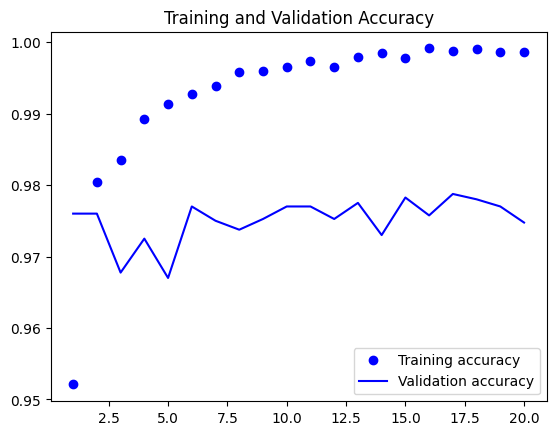

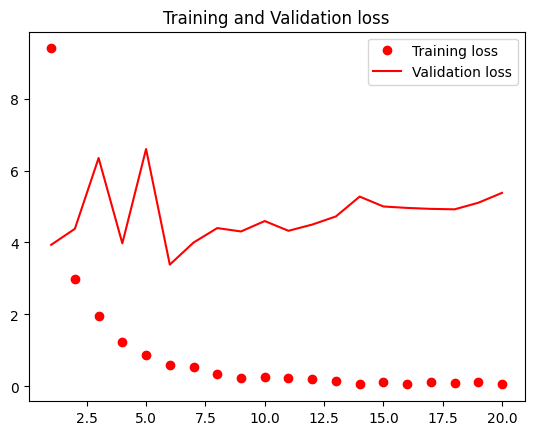

In [6]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "ro", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

## evaluating the model  on the test set

In [10]:
test_model = keras.models.load_model("feature_extraction.keras")
predictions = test_model.predict(test_features, batch_size=128)
#test_loss, test_acc = test_model.evaluate(test_features, batch_size=128)
print(predictions[0])

8/8 [==============================] - 0s 6ms/step
[0.99966747]


In [16]:
predictions = test_model.predict(test_features, batch_size=128)
#test_loss, test_acc = test_model.evaluate(test_features, batch_size=128)
print(predictions[900])

8/8 [==============================] - 0s 10ms/step
[0.]


In [17]:
test_features.shape

(1000, 5, 5, 512)